In [4]:
#from astropy.io import fits 
#from astropy.table import Table

#imgl=fits.getdata(filename)
#headl=fits.getheader(filename)

In [1]:
from astropy.utils.data import download_file
from astropy.io import fits

image_file=download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)



In [2]:
fits.info(image_file)

Filename: /home/csat8911/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [5]:
image_data = fits.getdata(image_file, ext=0)
image_data.shape

(893, 891)

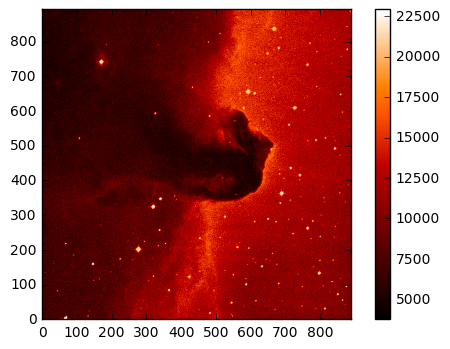

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(image_data, cmap='gist_heat', origin='lower')
plt.colorbar();

In [15]:
#Another way to do it

hdulist = fits.open(image_file)
hdulist.info()

Filename: /home/csat8911/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [16]:
header = hdulist['PRIMARY'].header
data = hdulist['PRIMARY'].data
hdulist.close()

In [17]:
print(repr(header[:10]))

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               


In [19]:
print(header[:10].keys())
print(header[:10].values())
print(header['ORIGIN'])
print (header.comments['ORIGIN'])

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'DATE', 'ORIGIN', 'SURVEY', 'REGION']
[True, 16, 2, 891, 893, True, '2014-01-09', 'STScI/MAST', 'SERC-ER', 'ER768']
STScI/MAST
GSSS: STScI Digitized Sky Survey


In [20]:
from astropy.wcs import WCS
wcs= WCS(header)
print wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.599416666666656  -4.9466388888888888  
CRPIX : -716.333144294269  -8444.6494669822605  
PC1_1 PC1_2  : 0.015029018460682027  -9.6373577765719806e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893


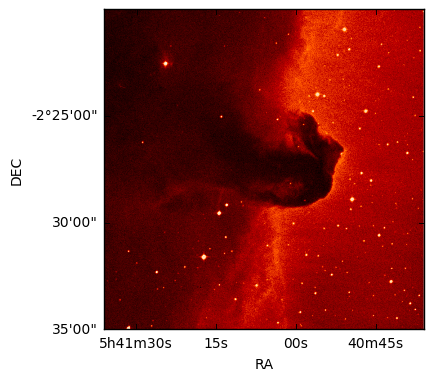

In [21]:
fig = plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.imshow(data,cmap='gist_heat', origin='lower' )
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');


In [26]:
from astropy.coordinates import SkyCoord
c0=SkyCoord('5h41m00s','-2d27m00s', frame='icrs')
print c0

<SkyCoord (ICRS): (ra, dec) in deg
    ( 85.25, -2.45)>


In [29]:
center=wcs.all_world2pix(c0.ra,c0.dec,0)
print(center)

[array(534.1235215073059), array(475.5504697035576)]


In [30]:
from astropy.nddata import Cutout2D

size=400
cutout=Cutout2D(data, center, size,wcs=wcs)

print cutout.bbox_original

((276, 675), (334, 733))


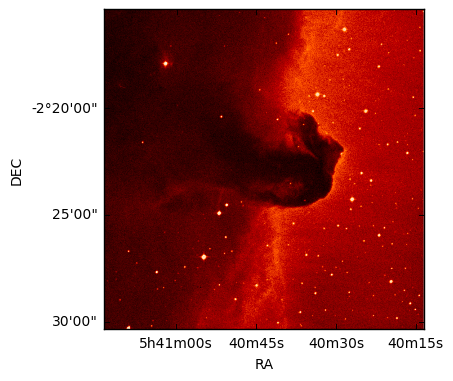

In [31]:
fig = plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.imshow(data,cmap='gist_heat', origin='lower' )
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');


In [35]:
cheader=cutout.wcs.to_header()
primaryhdu= fits.PrimaryHDU(cutout.data,cheader)
hdulist = fits.HDUList([primaryhdu])
hdulist.writeto('horse.fits',overwrite=True)